# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [73]:
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2
from Model import RetirementModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
model = RetirementModelClass(name='baseline',solmethod='egm')
#print(model)
model.solve()
model.simulate()

# Time the model

In [4]:
import my_timer

In [5]:
def solve():
    model.solve()
    
def simulate():
    model.simulate()

funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve'),
             (funcs[1], 'simulate')])

In [6]:
my_timer.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+----------+------+--------+------+------+-------+
|   func   |  lq  | median | mean |  uq  | neval |
+----------+------+--------+------+------+-------+
|  solve   | 1.97 |  2.0   | 2.02 | 2.04 |  10.0 |
| simulate | 1.18 |  1.21  | 1.22 | 1.23 |  10.0 |
+----------+------+--------+------+------+-------+


# Time parts of the model

# Visualize the solution

In [7]:
import figs
from transitions import age

# Visualize the simulation

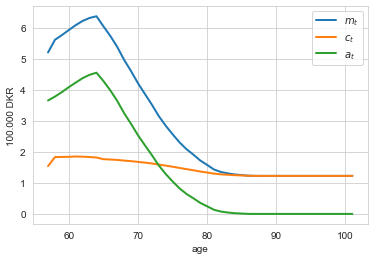

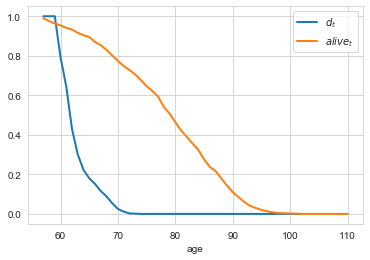

In [75]:
import figs
from transitions import age

figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

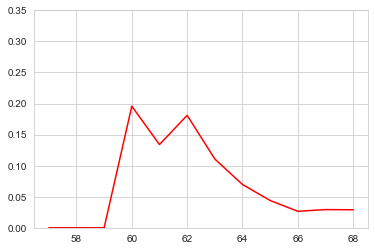

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from transitions import age
par = model.par
sim = model.sim

avg_probs = np.zeros(12)
for t in range(len(avg_probs)):
    avg_probs[t] = np.mean(sim.probs[t])#/np.count_nonzero(sim.probs[t])
    
plt.ylim(top=0.35)
plt.plot(age(np.arange(12)),avg_probs,'r')

In [39]:
sim.ret_age

array([ 1.,  0.,  1., nan,  0.,  0., nan,  0.,  0.,  0.,  0.,  1., nan,
        1.,  0.,  0., nan,  1.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,
        1.,  0.,  1., nan,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0., nan,
        1.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1., nan,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       nan,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0., nan,  0.,  1.,
       nan,  0.,  0.,  0., nan,  0.,  1., nan,  1.,  0.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., nan,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., nan,  0.,  1., nan,
        0.,  0.,  0.,  0., nan, nan,  0.,  0.,  1.,  1.,  0.,  0

# OLD

In [11]:
model.sol.d[0]

AttributeError: 'SolClass' object has no attribute 'd'

In [2]:
model = RetirementModelClass(name='baseline',solmethod='egm')
model.write_run_file(filename='run.py',method='test') # open run.py and have a look
!python run.py

solution time: 1.8 secs


In [ ]:
from consav import runtools
model.write_run_file(filename='run.py',solmethod='egm',method='test',Na=500)

for threads in [8,4,2,1]:
    runtools.write_numba_config(threads=threads)
    print(f'threads = {threads}')
    !python run.py
    print('')

threads = 8


In [12]:
import figs
from transitions import age

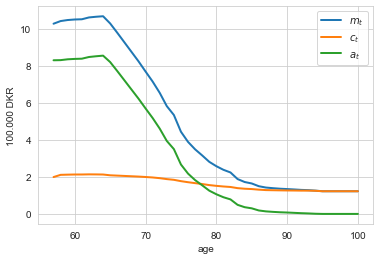

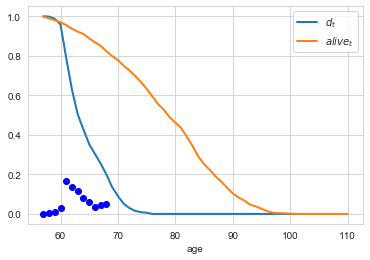

In [24]:
figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

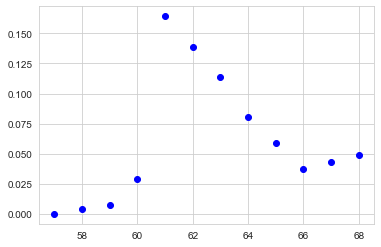

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from transitions import age
par = model.par
sim = model.sim

avg_probs = np.zeros(12)
for t in range(len(avg_probs)):
    avg_probs[t] = np.nanmean(sim.probs[t])
    
plt.plot(age(np.arange(12)),avg_probs,'bo')

In [4]:
sol = model.sol
#sol.c[5,0] - sol.c[5,7]

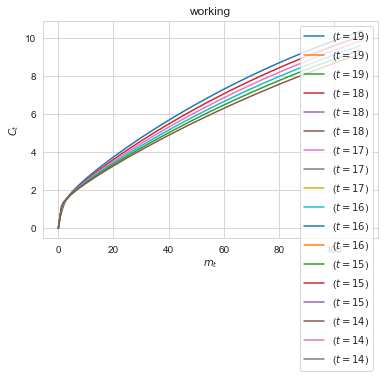

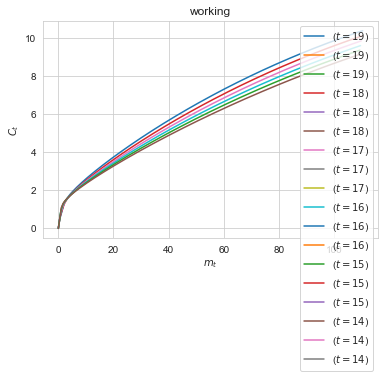

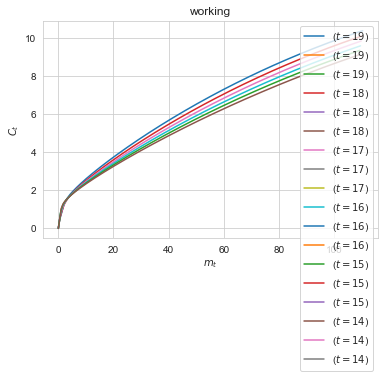

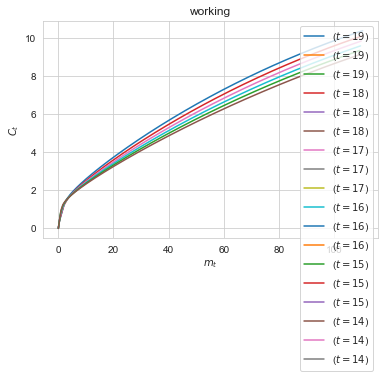

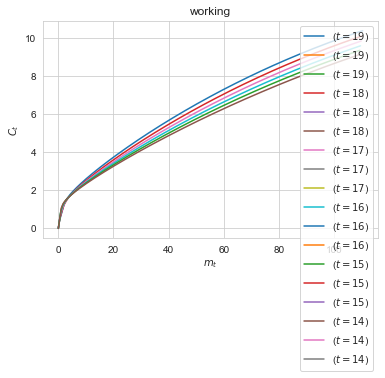

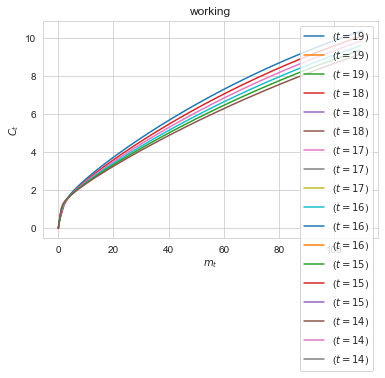

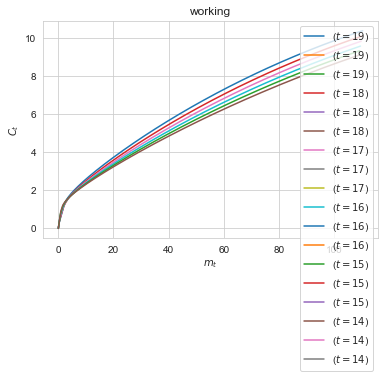

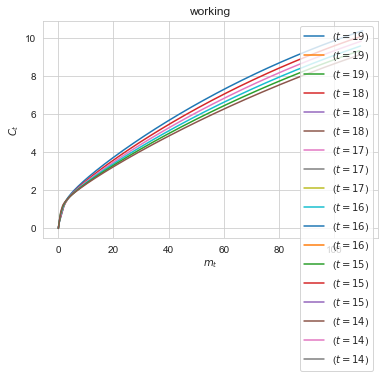

In [6]:
import figs
for st in model.par.states:
    figs.cons_choice(model,[19,18,17,16,15,14],st,choice='work')

In [7]:
figs.cons_choice(model,[model.par.T-5],choice='retire')

TypeError: cons_choice() missing 1 required positional argument: 'st'

In [83]:
#utility.inv_marg_func(model.sol.q[19],model.par)

In [84]:
#model.sol.c[15]

In [8]:
figs.cons_choice(model,[7,8,9],choice='work')

TypeError: cons_choice() missing 1 required positional argument: 'st'